## PANDAS
- Powerful module that is built and optimized on top of Numpy.
- It provides a set of data structures particularly suited to time-series and spreadsheet style data analysis just as like pivot tables in excel.
- It provides a _Dataframe_ object built on a Numpy platform to ease data manipulation more especially for time-series for statistical processing.
- Pandas is popular in Quantitative finance.

**Key Features of Pandas**
* Fast data manipulation and alignment.
* Tools for exchanging data between different formats and between different SQL databases.
* Handling missing data.
* Cleaning up messy data.

##### Using Series
- The easiest way to think about Pandas Series object is as a container for the Numpy arrays one for index and one for the data. That is Numpy arrays have integer indexing just like regular Python lists.

In [1]:
# Importing the numpy and pandas modules
import numpy as np
import pandas as pd

In [2]:
x = pd.Series([1, 2, 30, 0, 18, 20])
x

0     1
1     2
2    30
3     0
4    18
5    20
dtype: int64

You can index the object i.e through slicing.

In [3]:
x[1:3] # Numpy slicing

1     2
2    30
dtype: int64

You can get Numpy arrays directly from the object using the ```values``` keyword

In [4]:
x.values # Values

array([ 1,  2, 30,  0, 18, 20], dtype=int64)

In [5]:
x.values[1:4] # array([ 2, 30,  0], dtype=int64)

array([ 2, 30,  0], dtype=int64)

Get index which is Numpy array like using the ```index``` keyword.

In [6]:
x.index # RangeIndex(start=0, stop=6, step=1)

RangeIndex(start=0, stop=6, step=1)

You can have mixed types unlike in Numpy arrays.

In [7]:
data = pd.Series([10, 20, 30, 'Oranges', 'Avocadoes', 'More stuff'])
data

0            10
1            20
2            30
3       Oranges
4     Avocadoes
5    More stuff
dtype: object

In [8]:
data.index # Series index

RangeIndex(start=0, stop=6, step=1)

In [9]:
data[0] # 10

10

In [10]:
data[:-1]

0           10
1           20
2           30
3      Oranges
4    Avocadoes
dtype: object

In [11]:
data.dtype # object data type

dtype('O')

**Note:** Mixed types in a single column can lead to downstream inefficiencies and other problems. The index in the _Series_ generalizes beyond integer indexing. For example:

In [12]:
y = pd.Series([1,2,3], index=['a', 'b', 'cat'])
y['a'] # 1
y['cat'] # 3

3

Because of its legacy as a financil data processing too, Pandas is really good at managing time-series.

In [13]:
dates = pd.date_range('20210101', periods=12)
z = pd.Series(range(12), index=dates) # Explicitly assign index
z # Default calendar-daily

2021-01-01     0
2021-01-02     1
2021-01-03     2
2021-01-04     3
2021-01-05     4
2021-01-06     5
2021-01-07     6
2021-01-08     7
2021-01-09     8
2021-01-10     9
2021-01-11    10
2021-01-12    11
Freq: D, dtype: int64

You can only do basic descriptive statistics on the data and not the index.

In [14]:
z.mean()

5.5

In [15]:
z.std()

3.605551275463989

You can also plot the serie using its methods:

<Axes: >

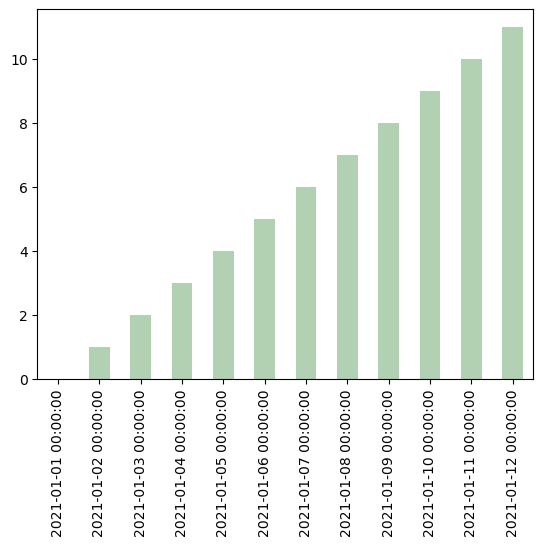

In [16]:
z.plot(kind='bar', alpha=0.3, color='darkgreen')# You can add extra matplotlib keywords

- Data can be summarized by the index for example; to count the individual days of the week for which we had data:

In [17]:
z.groupby(by=lambda i:i.dayofweek).count()

0    2
1    2
2    1
3    1
4    2
5    2
6    2
dtype: int64

- The convention 0 is Monday, 1 is Tuesday and so forth.
- The ```groupby``` method partition the data into disjoint groups based on the predicate given via the ```by``` keyword argument. Consider the following Series:

In [18]:
m = pd.Series(range(5), index=[1,2, 10, 19, 6])
m

1     0
2     1
10    2
19    3
6     4
dtype: int64

- Let us group it in the following according to whether the elements in the values are _even_ or _odd_ using the modulus(%) operator.

In [19]:
grp = m.groupby(lambda i:i%2) # Odd or Even
grp.get_group(0) # Even group

2     1
10    2
6     4
dtype: int64

In [20]:
grp.get_group(1) # Odd group

1     0
19    3
dtype: int64

- The first line groups the elements of the series object by whether or not the index is even or not.
- The ```lambda``` function returns **0** or **1** depending on whether or not the corresponding index is even or odd respectively.
- To reduce it to a single value we can perform alot o summarization. For example , in the following we get the maximum value for each group:

In [21]:
grp.max()

0    4
1    3
dtype: int64

**Note:** The operation above return another _Series_ object with an _index_ corresponding to _[0, 1]_ elements. There will be as many groups as there are unique outputs of the ```by``` function.

#### DataFrame
_DataFrame:_ is an encapsulation of group of Series objects that share a single index.
- DataFrame can be created with dictionaries as in the following:

In [22]:
# Creating a DataFrame using a dictionary
df = pd.DataFrame({'col1':[1, 2, 4,5], 'col2':[10,20,30,40]})
df

,col1,col2
0,1,10
1,2,20
2,4,30
3,5,40


**Note:** Keys in the input dictionary are the headings(labels) of the DataFrame, with their corresponding values from the dictionary.
- A DataFrame is also indexed just like the Series object.
- We use the ```iloc``` to extract elements from each column. ```iloc``` ignores the given index and return to traditional Numpy slicing.

In [23]:
df.iloc[:2,:2] # Get a section

,col1,col2
0,1,10
1,2,20


OR
- by directly slicing

In [24]:
df['col1'] # Indexing

0    1
1    2
2    4
3    5
Name: col1, dtype: int64

- using the dot notation

In [25]:
df.col1 # Dot notation

0    1
1    2
2    4
3    5
Name: col1, dtype: int64

- A DataFrame preserves its column-wise structure even in its subsequent operations.

In [26]:
# Subsequent operations and column-wise structure
df.sum() # Each column is totaled separately

col1     12
col2    100
dtype: int64

- DataFrames are more powerful in supporting grouping more than the Series. Example:

In [27]:
# Make a DataFrame
df = pd.DataFrame({'col1':[1,1,0,0], 'col2':[1,2,3,4]})
df

,col1,col2
0,1,1
1,1,2
2,0,3
3,0,4


**Note**
- _col1_ has two distinct entries, we can group the data as in the following:

In [28]:
grp = df.groupby('col1')
grp.get_group(0)

,col1,col2
2,0,3
3,0,4


In [29]:
grp.get_group(1)

,col1,col2
0,1,1
1,1,2


- Each group corresponds to entries to which **col1** was either of its two values.
- After grouping, we can now functionally summarize each of the groups as in the following:

In [30]:
grp.sum()

,col2
col1,
0,7
1,3


- ```DataFrame``` can compute new columns based on the existing  columns using the ```eval``` method. For example:

In [31]:
# You can assign the new output to the new column as shown below
df['col_sum'] = df.eval('col1+col2')
df

,col1,col2,col_sum
0,1,1,2
1,1,2,3
2,0,3,3
3,0,4,4


- We can group using multiple columns

In [32]:
# grp = df.groupby(['sum_col', 'col1'])

- Doin the sum operation on each group

In [33]:
res = grp.sum()
res

,col2
col1,
0,7
1,3


- Use ```unstack``` to obtain a tabular view of the result.

In [34]:
# Tabular view of the result
res.unstack()

      col1
col2  0       7
      1       3
dtype: int64

- ```NaN``` values indicate position where there is no entry

**Indexing DataFrame**

In [35]:
data = np.arange(len(dates) * 4).reshape(-1,4)
df = pd.DataFrame(data, index=dates, columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
2021-01-01,0,1,2,3
2021-01-02,4,5,6,7
2021-01-03,8,9,10,11
2021-01-04,12,13,14,15
2021-01-05,16,17,18,19
2021-01-06,20,21,22,23
2021-01-07,24,25,26,27
2021-01-08,28,29,30,31
2021-01-09,32,33,34,35
2021-01-10,36,37,38,39


- You can access each column by 

    - Column name

In [36]:
# Using column name
df['A']

2021-01-01     0
2021-01-02     4
2021-01-03     8
2021-01-04    12
2021-01-05    16
2021-01-06    20
2021-01-07    24
2021-01-08    28
2021-01-09    32
2021-01-10    36
2021-01-11    40
2021-01-12    44
Freq: D, Name: A, dtype: int32

    - Using a quicker basic computing and indexing

In [37]:
df.A

2021-01-01     0
2021-01-02     4
2021-01-03     8
2021-01-04    12
2021-01-05    16
2021-01-06    20
2021-01-07    24
2021-01-08    28
2021-01-09    32
2021-01-10    36
2021-01-11    40
2021-01-12    44
Freq: D, Name: A, dtype: int32

- We can do some basic computing and indexing

In [39]:
df.loc[:dates[3]] # This includes the endpoints unlike in the Python convention

,A,B,C,D
2021-01-01,0,1,2,3
2021-01-02,4,5,6,7
2021-01-03,8,9,10,11
2021-01-04,12,13,14,15


In [41]:
df.loc[:,'A':'C'] # All rows by slice of column labels

,A,B,C
2021-01-01,0,1,2
2021-01-02,4,5,6
2021-01-03,8,9,10
2021-01-04,12,13,14
2021-01-05,16,17,18
2021-01-06,20,21,22
2021-01-07,24,25,26
2021-01-08,28,29,30
2021-01-09,32,33,34
2021-01-10,36,37,38


#### Reindexing